# Lab1: Data Preparation Example: Exploration, Partition and Regression

### Purpose

In Lab 1, you will learn how to:

a. generate data. 

b. create summary statistics for exploratory data analysis.

C. create scatterplot matrix and correlation plot. 

d. do data partition.

e. do linear regression. 

### Useful libraries for this Lab

a. pandas, for data frame.

b. numpy, for data array. 

c. scipy, for data generating process (DGP)

d. matplotlib and seaborn, for plotting. 

e. sklearn, for linear model.

f. os, for the working directory. 

In [1]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import os

wd = os.getcwd() # Set your working directory. 
print(wd)

/Users/jasonyou/STAT4609/2020Spring/Tutorial1


In Lab 1, we consider the following DGP: 

$$y=2+8x_1+0.8x_2+\epsilon$$

where $x_1$, $x_2$ and $\epsilon$ are independent standard normal variates. The sample size $n$ is equal to 712. Basic descriptive statistics are reported below.

In [2]:
mean_ = [0,0,0]
cov_ = [[1,0,0],[0,1,0],[0,0,1]]
n = 712

x1,x2,epsilon = np.random.multivariate_normal(mean_,cov_,n).T
y = 2+8*x1+0.8*x2+epsilon

Try to use function $stat.describe$ to have an overview of your generated data

In [3]:
print(stats.describe(x1))

DescribeResult(nobs=712, minmax=(-4.063939396926706, 3.030964666682098), mean=-0.04800512613669049, variance=1.006002042104986, skewness=0.048981064631367206, kurtosis=0.2981491147488611)


In [4]:
print(stats.describe(x2))

DescribeResult(nobs=712, minmax=(-2.7310693512462825, 3.2681295808423587), mean=-0.013633268632843951, variance=1.040978791380647, skewness=-0.003133761321358408, kurtosis=-0.12432153696681691)


In [5]:
print(stats.describe(epsilon))

DescribeResult(nobs=712, minmax=(-2.981386062738717, 2.8194400989193964), mean=0.010974306771097763, variance=0.9710169610176318, skewness=-0.09571086789454536, kurtosis=-0.06942742358481357)


In [6]:
print(stats.describe(y))

DescribeResult(nobs=712, minmax=(-31.464110999022363, 26.620010515382926), mean=1.6160266827712988, variance=65.9352415795651, skewness=0.014011397106833353, kurtosis=0.319032596098376)


In [7]:
mydata = np.concatenate((y.reshape((n,1)), 
                         x1.reshape((n,1)),
                         x2.reshape((n,1)),
                         epsilon.reshape((n,1))), axis=1)
print(mydata.shape)
type(mydata)

(712, 4)


numpy.ndarray

In [8]:
mydata = pd.DataFrame(mydata, columns=['y', 'x1', 'x2', 'e'])
type(mydata)

pandas.core.frame.DataFrame

In [9]:
print(stats.describe(mydata))

DescribeResult(nobs=712, minmax=(array([-31.464111  ,  -4.0639394 ,  -2.73106935,  -2.98138606]), array([26.62001052,  3.03096467,  3.26812958,  2.8194401 ])), mean=array([ 1.61602668, -0.04800513, -0.01363327,  0.01097431]), variance=array([65.93524158,  1.00600204,  1.04097879,  0.97101696]), skewness=array([ 0.0140114 ,  0.04898106, -0.00313376, -0.09571087]), kurtosis=array([ 0.3190326 ,  0.29814911, -0.12432154, -0.06942742]))


Next, the package seaborn is used to do the correlation plot and scatterplot matrix of four variables: $y$, $x_1$, $x_2$ and $\epsilon$. 

In [10]:
print(mydata.corr()) # Using DataFrame to compute correlation. 

           y        x1        x2         e
y   1.000000  0.987382  0.091948  0.124087
x1  0.987382  1.000000 -0.009914  0.001738
x2  0.091948 -0.009914  1.000000  0.010096
e   0.124087  0.001738  0.010096  1.000000


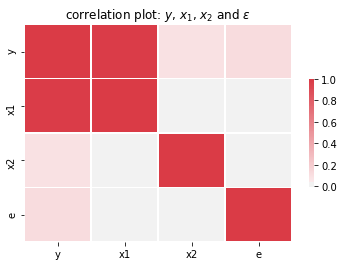

In [11]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(mydata.corr(), cmap=cmap, vmax=1., center=0,
            linewidths=.5, cbar_kws={"shrink": .5})

plt.title('correlation plot: $y$, $x_1$, $x_2$ and $\epsilon$')

plt.show()

/Users/jasonyou/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


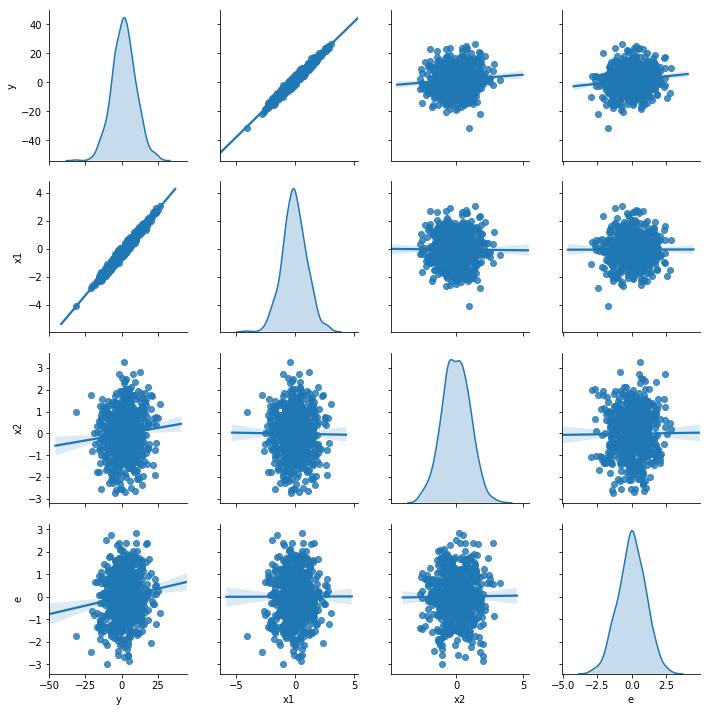

In [12]:
sns.pairplot(mydata,diag_kind="kde",kind="reg")

plt.show()

In [13]:
train_ratio = 0.8
test_ratio = 1-train_ratio

from random import sample

train_indices = sample(range(n),int(n*train_ratio))
test_indices = [x for x in range(n) if x not in train_indices]

train_data = mydata.iloc[train_indices,:].values
test_data = mydata.iloc[test_indices,:].values

print(stats.describe(train_data))

DescribeResult(nobs=569, minmax=(array([-31.464111  ,  -4.0639394 ,  -2.70214701,  -2.86665182]), array([26.62001052,  3.03096467,  3.26812958,  2.8194401 ])), mean=array([ 1.46234547, -0.06687448, -0.02992615,  0.02128223]), variance=array([66.94442488,  1.02100675,  1.04099642,  0.96974134]), skewness=array([-0.03246458, -0.0049726 , -0.02845286, -0.12206503]), kurtosis=array([ 0.36649292,  0.34085458, -0.18525184, -0.12714756]))


In [14]:
train_X = train_data[:,1:-1]
train_y = train_data[:,0]
test_X = test_data[:,1:-1]
test_y = test_data[:,0]

Documentation for regression in $sklearn$ is here
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Based on the previous data partition, we use the training data to fit the model, then test the effectiveness of model on the test data. The mean squared error (MSE) is considered to measure the performance of the fitted model. 

In [15]:
# create linear regression object
regr = linear_model.LinearRegression()

# train the model using the training sets
regr.fit(train_X, train_y)

# make predictions using the testing set
y_pred = regr.predict(test_X)

# the coefficients
print('Coefficients: ', regr.intercept_, regr.coef_[0], regr.coef_[1])
# the mean squared error
print("Mean squared error: %.2f" % mean_squared_error(test_data[:,0], y_pred))


Coefficients:  2.023903806803851 8.033879663677443 0.8118923686519736
Mean squared error: 0.99


function $score$ returns the coefficient of determination $R^2$ of the prediction, which is used to measure the goodness of fit.

In [16]:
regr.score(test_X, test_y)

0.9839494908868818